In [1]:
import pandas as pd

merged_results = pd.read_excel('all_merged_data.xlsx')

In [2]:
uniform_dereg_mask = merged_results['Gene'].isin(['F17468', 'B05038', 'F11011', 'C01375', 'D18678', 'E23518', 'C03564', 
                                                  'D01353', 'B12716', 'E31757', 'E30789', 'E31383', 'E19965', 'F05104', 'D06952'])
uniform_dereg = merged_results[uniform_dereg_mask]

'''uniform_dereg["order"] = uniform_dereg.iloc[:, 4:13].mean(axis=1)
uniform_dereg = uniform_dereg.sort_values(by='order')'''

print(uniform_dereg)


    Unnamed: 0    Gene TF number Assigned name  scSoA  scYFP  inYFP  scTlG  \
2            2  C03564     TF013             -   1.48   1.08   0.00   0.72   
8            8  D01353     TF024             -  -2.73  -2.15  -2.44  -2.79   
9            9  E31383     TF051             -  -0.84  -0.45   0.00  -0.26   
13          13  D18678     TF035             -   0.50   0.41   0.00   0.20   
16          16  F11011     TF132             -   0.51   0.24   0.00   0.29   
20          20  E23518     TF146             -   0.58   0.33   0.00   0.27   
23          23  D06952     TF028             -  -0.50  -0.39   0.00  -0.28   
25          25  F17468     TF066             -   0.42   0.23   0.00   0.25   
26          26  E19965     TF133             -  -0.60  -0.41   0.00   0.00   
48          48  B05038     TF131          ZNC1   0.33   0.43   0.00   0.19   
50          50  E31757     TF053          BRG1   2.24   5.57   0.00   0.00   
51          51  F05104     TF057        TFIIIA  -0.31  -0.40   0

In [3]:
uniform_dereg['HSS_sum'] = uniform_dereg['scSoA'] + uniform_dereg['scYFP']
uniform_dereg['UPR_sum'] = uniform_dereg['inYFP'] + uniform_dereg['scTlG']
uniform_dereg = uniform_dereg.sort_values(by=['HSS_sum'])
uniform_dereg.drop(['KO_inRedStar', 'KO_normalized_inRedStar'], axis=1, inplace=True)
print(uniform_dereg)

    Unnamed: 0    Gene TF number Assigned name  scSoA  scYFP  inYFP  scTlG  \
8            8  D01353     TF024             -  -2.73  -2.15  -2.44  -2.79   
9            9  E31383     TF051             -  -0.84  -0.45   0.00  -0.26   
26          26  E19965     TF133             -  -0.60  -0.41   0.00   0.00   
23          23  D06952     TF028             -  -0.50  -0.39   0.00  -0.28   
51          51  F05104     TF057        TFIIIA  -0.31  -0.40   0.00   0.00   
79          79  E30789     TF050             -   0.00  -0.52  -1.05  -1.15   
80          80  B12716     TF006          HAC1   0.00   0.00   0.35   0.29   
61          61  C01375     TF012             -   0.22   0.31   0.33   0.30   
25          25  F17468     TF066             -   0.42   0.23   0.00   0.25   
16          16  F11011     TF132             -   0.51   0.24   0.00   0.29   
48          48  B05038     TF131          ZNC1   0.33   0.43   0.00   0.19   
13          13  D18678     TF035             -   0.50   0.41   0

C:\Users\User\AppData\Local\Temp\ipykernel_80432\978485785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniform_dereg['HSS_sum'] = uniform_dereg['scSoA'] + uniform_dereg['scYFP']
C:\Users\User\AppData\Local\Temp\ipykernel_80432\978485785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniform_dereg['UPR_sum'] = uniform_dereg['inYFP'] + uniform_dereg['scTlG']


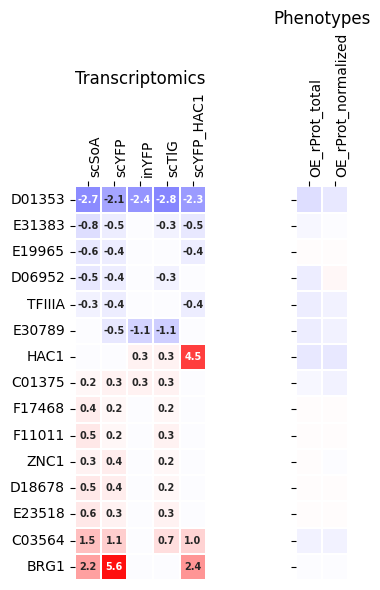

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


# Define the numeric data and row labels
numeric_data1 = uniform_dereg.iloc[:, 4:9]
numeric_data2 = uniform_dereg.iloc[:, 9:11]

row_labels = [gene if assigned_name == '-' else assigned_name 
              for assigned_name, gene in zip(uniform_dereg['Assigned name'], uniform_dereg['Gene'])]

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

annot_kws = {"size": 7, "weight": "bold"}


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 6), sharey=True)

# Plot the first heatmap
annot_data1 = numeric_data1.map(lambda x: f'{x:.1f}' if x != 0 else '')

# Create a blank annotation matrix for numeric_data2
annot_data2 = pd.DataFrame('', index=numeric_data2.index, columns=numeric_data2.columns)

# Specify annotations for chosen variants
annotations2 = {
    'OE_rProt_total': ['TF003', 'TF037', 'TF068', 'TF119', 'TF121', 'TF124', 'TF126', 'TF128'],
    'OE_rProt_normalized': ['TF037', 'TF068', 'TF121', 'TF124', 'TF126', 'TF128'],
}

# Add annotations based on specified genes
for column, genes in annotations2.items():
    for gene in genes:
        if gene in uniform_dereg['TF number'].values:
            annot_data2.loc[uniform_dereg['TF number'] == gene, column] = numeric_data2.loc[uniform_dereg['TF number'] == gene, column].apply(lambda x: f'{x:.1f}')


sns.heatmap(numeric_data1, ax=ax1, yticklabels=row_labels, cmap=cmap, center=0, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data1, fmt='', annot_kws=annot_kws,
            vmin=-4.5, vmax=6, cbar_kws={'format': '%.1f'})
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, yticklabels=row_labels, cmap=cmap, center=1, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data2, fmt='', annot_kws=annot_kws,
            vmin=0, vmax=2, cbar_kws={'format': '%.1f'})
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')

# Adjust the layout
plt.tight_layout()
#plt.savefig('subheatmap_uniform_wo_KO.png')
